# WIP

ADRIO v2 demo use-case

In [1]:
import numpy as np

import epymorph.geo.adrio.acs5 as acs5
import epymorph.geo.adrio.adrio2 as adrio
import epymorph.geo.adrio.us_tiger as tiger
from epymorph import *
from epymorph.geography.us_census import StateScope
from epymorph.simulator.data import evaluate_param

# Look ma, no geo!

rume = Rume.single_strata(
    ipm=ipm_library['sirs'](),
    mm=mm_library['centroids'](),
    init=init.SingleLocation(location=0, seed_size=10_000),
    scope=StateScope.in_states_by_code([
        'AZ', 'CO', 'NM', 'UT', 'NV', 'CA', 'OR', 'WA',
    ], year=2020),
    time_frame=TimeFrame.of("2015-01-01", 300),
    params={
        'ipm::beta': 0.4,
        'ipm::gamma': 1 / 5,
        'ipm::xi': 1 / 90,
        'mm::phi': 40.0,
        'population': acs5.Population(),
        'centroid': tiger.InternalPoint(),

        # Realistically, if I needed populations by age group, I would have a multistrata RUME,
        # but this is just for demonstrating these ADRIOs work...
        'population_by_age_table': acs5.PopulationByAgeTable(),
        'population_00-19': acs5.PopulationByAge(0, 19),
        'population_20-59': acs5.PopulationByAge(20, 59),
        'population_60-79': acs5.PopulationByAge(60, 79),
        'geo::label': tiger.Name(),

        # Example: I can use a different definition of centroid!
        # '*::centroid': tiger.GeometricCentroid(),

        # Example: I can calculate pop density (persons per km^2) by combining ADRIOs...
        # 1. get land area in m^2 from TIGER
        # 2. scale that to be in km^2
        # 3. use a generic pop density ADRIO which combines 'population' and 'land_area_km2'
        # '*::land_area_km2': adrio.Scale(tiger.LandAreaM2(), factor=1e-6),
        # '*::population_km2': adrio.PopulationPerKm2(),

        # Implementation of remaining acs5 attributes from adrio_census.py
        'average_household_size': acs5.AverageHouseholdSize(),
        'dissimilarity_index': acs5.DissimilarityIndex('White', 'Native'),
        'gini_index': acs5.GiniIndex(),
        'median_age': acs5.MedianAge(),
        'median_income': acs5.MedianIncome(),
    },
)

In [2]:
p1 = evaluate_param(rume, 'population_00-19')
p2 = evaluate_param(rume, 'population_20-59')
p3 = evaluate_param(rume, 'population_60-79')
p4 = evaluate_param(rume, 'average_household_size')
p5 = evaluate_param(rume, 'dissimilarity_index')
p6 = evaluate_param(rume, 'gini_index')
p7 = evaluate_param(rume, 'median_age')
p8 = evaluate_param(rume, 'median_income')

display(p1)
display(p2)
display(p3)
display(p4)
display(p5)
display(p6)
display(p7)
display(p8)

Evaluating PopulationByAgeTable ADRIO...
Completed PopulationByAgeTable ADRIO (30.261s).
Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.000s).
Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.000s).
Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.000s).
Evaluating AverageHouseholdSize ADRIO...
Completed AverageHouseholdSize ADRIO (1.356s).
Evaluating DissimilarityIndex ADRIO...
Completed DissimilarityIndex ADRIO (3.585s).
Evaluating GiniIndex ADRIO...
Completed GiniIndex ADRIO (1.206s).
Evaluating MedianAge ADRIO...
Completed MedianAge ADRIO (1.214s).
Evaluating MedianIncome ADRIO...
Completed MedianIncome ADRIO (2.040s).


array([1836857, 9986244, 1405688,  753880,  539036,  965716, 1022625,
       1830822])

array([ 3647013, 21461094,  3134038,  1619922,  1057305,  2197901,
        1633858,  4046677])

array([1398221, 6476190,  968900,  560741,  416069,  847429,  415591,
       1372944])

array([2, 2, 2, 2, 2, 2, 3, 2])

array([0.45477918, 0.13515806, 0.24425009, 0.16504944, 0.57190601,
       0.21115552, 0.33199027, 0.24426182])

array([0.4661, 0.4874, 0.4565, 0.4638, 0.4742, 0.4579, 0.4245, 0.4574])

array([37, 36, 36, 38, 38, 39, 31, 37])

array([61529, 78672, 75231, 62043, 51243, 65667, 74197, 77006])

Evaluating Population ADRIO...
Completed Population ADRIO (1.226s).
Evaluating InternalPoint ADRIO...
Completed InternalPoint ADRIO (0.326s).
Evaluating Name ADRIO...
Completed Name ADRIO (0.109s).
Running simulation (BasicSimulator):
• 2015-01-01 to 2015-10-28 (300 days)
• 8 geo nodes
|####################| 100% 
Runtime: 0.548s


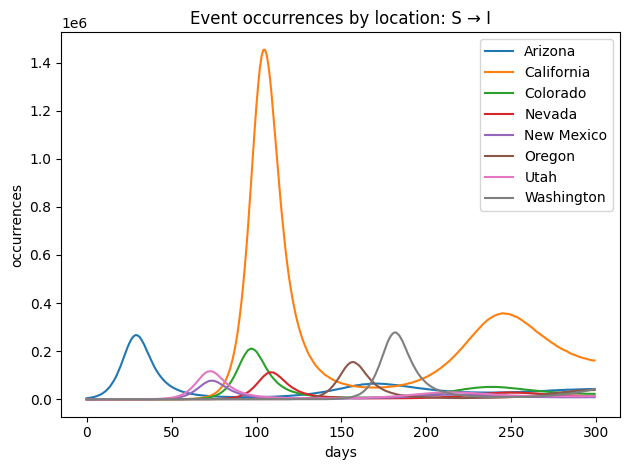

In [3]:
sim = BasicSimulator(rume)
with sim_messaging(sim):
    out = sim.run()

plot_event(out, event_idx=rume.ipm.event_by_name("S->I"))